In [133]:
import nasdaqdatalink
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.dates
import math
import datetime

In [134]:
style.use('ggplot') #for graphics

In [135]:
api_key = ('BQD6GUzE8KvxS_pgLJs2') #api key for Nasdaq data

In [136]:
nasdaqdatalink.apiconfig = api_key

In [137]:
df = nasdaqdatalink.get('BITFINEX/BTCUSD') #bitcoin data from Nasdaq

In [138]:
df.head() #to show Nasdaq data table

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


In [139]:
df.dropna(inplace = True) #to delete NAN variables of data

In [140]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Last'] * 100.0 #for produce parameter

In [141]:
df['ASKBID_PCT'] = (df['Ask'] - df['Bid']) / df['Ask'] * 100.0 #for produce parameter

In [142]:
df = df[['High', 'Low', 'Last', 'HL_PCT', 'ASKBID_PCT', 'Volume']]

In [143]:
df.head()

,High,Low,Last,HL_PCT,ASKBID_PCT,Volume
Date,,,,,,
2014-04-15,513.9000,452.00,505.0000,12.257426,0.291106,21013.584774
2014-04-16,547.0000,495.00,538.0000,9.665428,0.185874,29633.358705
2014-04-17,538.5000,486.10,508.0000,10.314961,0.385827,20709.783819
2014-04-18,509.0000,474.25,482.7500,7.198343,0.420801,10458.045243
2014-04-19,513.9899,473.83,507.4999,7.913282,0.977103,8963.618369


In [144]:
forecast_out = int(math.ceil(len(df) * 0.01)) #multiply the length of the rows by 1% and round the dataframe up

In [145]:
df['Label'] = df['Last'].shift(-forecast_out) #forecast_out value is moved up to assume today's value as the last days value

In [146]:
x = df.drop(columns = 'Label') #x row of linear regression

In [147]:
y = df.iloc[:, -1] # y row of linear regression

In [148]:
x_toPredict = x[-forecast_out:]

In [149]:
x = x[:-forecast_out]

In [150]:
y = y[:-forecast_out]

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0) # 80% of data used for train and 20% data used for test

In [152]:
regressor = LinearRegression() #called lienar regression algorithm

In [153]:
regressor.fit(x_train, y_train)

LinearRegression()

In [154]:
accuracy = regressor.score(x_test, y_test)

In [155]:
print(accuracy)

0.9201586763516597


In [156]:
prediction_set = regressor.predict(x_toPredict)

In [157]:
df['Prediction'] = np.nan

In [158]:
last_date = df.iloc[-1].name

In [159]:
last_date_time = last_date.timestamp()

In [160]:
one_day = 86400 # one day is 86400 second

In [161]:
next_date_time = last_date_time + one_day

In [162]:
for i in prediction_set:
    next_date = datetime.datetime.fromtimestamp(next_date_time) #repeats prediction_set times
    next_date_time += one_day #adds one day to each day
    df.loc[next_date] = [np.nan for q in range(len(df.columns) - 1)] + [i] 

<Axes: xlabel='Date'>

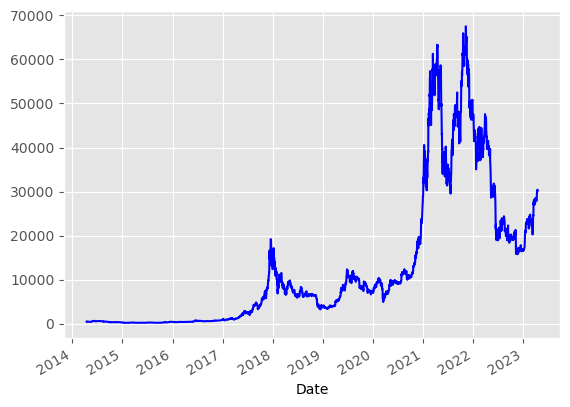

In [163]:
df['Last'].plot(color = 'b')

<Axes: xlabel='Date'>

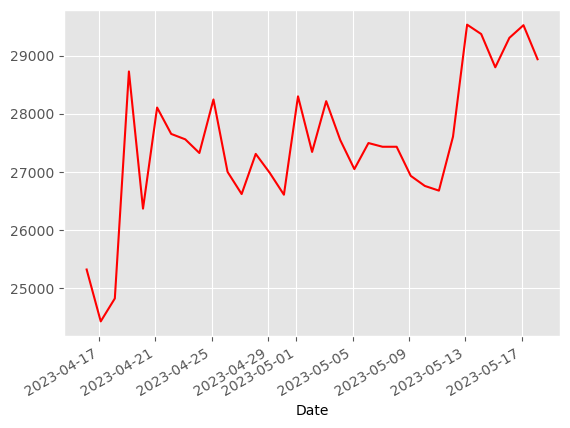

In [164]:
df['Prediction'].plot(color = 'r')